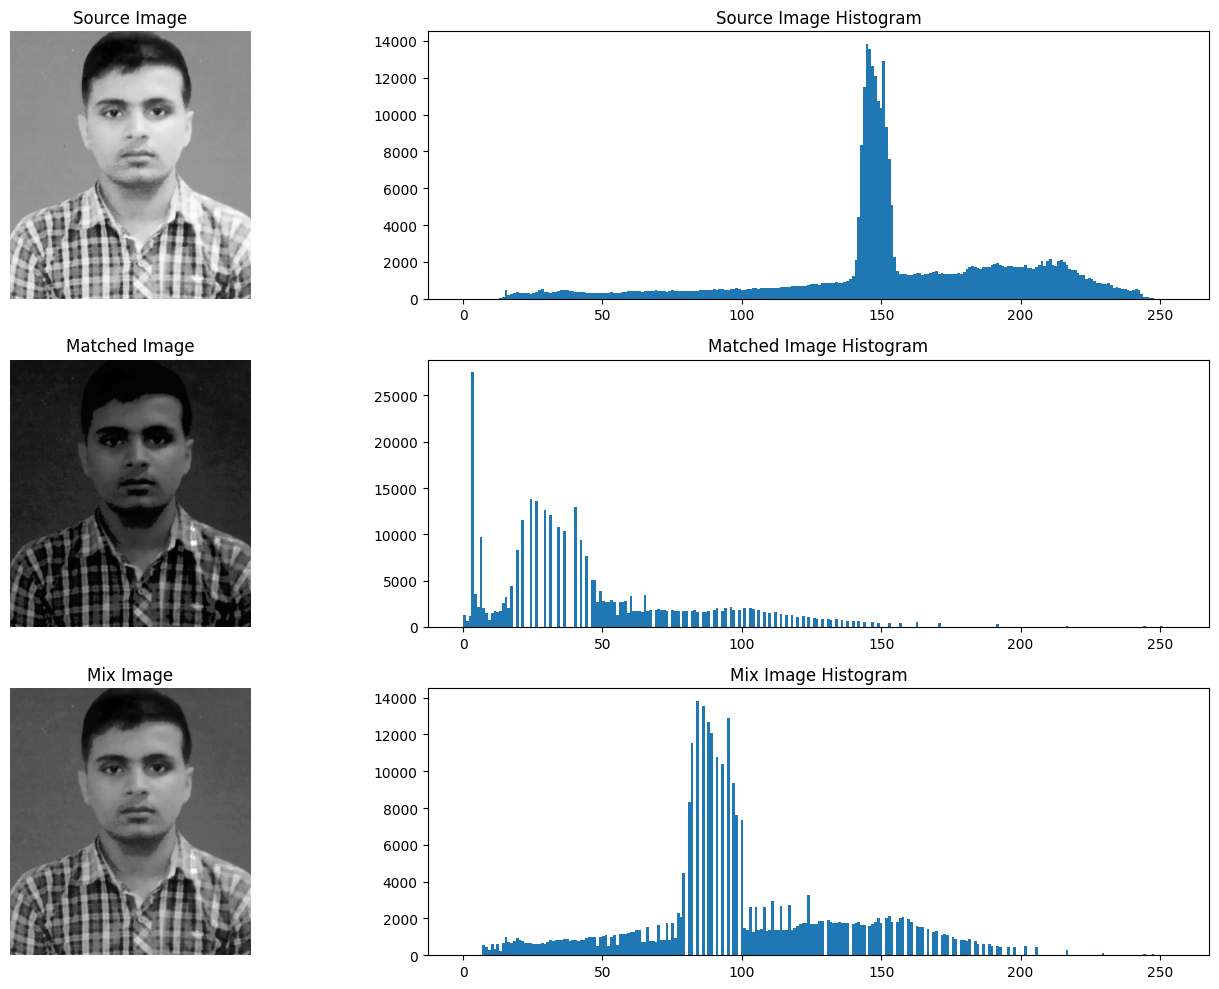

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

source_image = cv2.imread('/content/22.png', cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread('/content/pics11.jpg', cv2.IMREAD_GRAYSCALE)
matched_image = match_histograms(source_image, reference_image).astype(np.float32)
source_image_float = source_image.astype(np.float32)
mix_image = cv2.addWeighted(source_image_float, 0.5, matched_image, 0.5, 0)
mix_image = np.clip(mix_image, 0, 255).astype(np.uint8)

def display_images_and_histograms(source, reference, mix):
    """Displays the given images and their histograms."""

    images = [source, reference, mix]
    titles = ['Source Image', 'Matched Image', 'Mix Image']

    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(3, 2, 2 * i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

        plt.subplot(3, 2, 2 * i + 2)
        plt.hist(images[i].ravel(), bins=256, range=(0, 255))
        plt.title(titles[i] + ' Histogram')

    plt.tight_layout()
    plt.show()

display_images_and_histograms(source_image, matched_image, mix_image)